# Data Analysis - Traffic Related Violations

## Aims, objectives & background

## 1.1 Introduction
https://www.encyclopedia.com/law/encyclopedias-almanacs-transcripts-and-maps/traffic-violations#:~:text=Department%20of%20Transportation-,Background,of%2012%20miles%20per%20hour.

I've always been interested in anything related to the crime world and understanding the psychology of the perpetrators so while looking for topics I found this dataset which I thought would have interesting question that could be explored and at the same time keep me entertained. 

A traffic violation is any violation of vehicle laws that is committed by the driver of a vehicle.
Traffic violations followed the invention of the automobile. The first traffic ticket in the United States was allegedly given to a New York City cab driver on May 20, 1899, for going at the breakneck speed of 12 miles per hour. Since that time, countless citations have been issued for traffic violations across the country, and states have reaped untold billions of dollars of revenue from violators.

The most common type of traffic violation is a speed limit violation among the many other types of violations. I would like to explore motivational factors which makes the driver violate if I do find one.

I don't think there will be answers to questions that have never been explored before but this will be my first look at it.
I wanted to analyze mostly the top layer for now as this is my first analysis ever and see if what I thought were true are indeed accurate and maybe explore some complex relationship if I see any. For example if female are better driver or if there are hours in the days which we should avoid the road. 
I will not be using all the column for my analysis as it will be too much pressure as this is my opening to the world of data analysis.

## 1.2 Aims & Objectives

I would like to explore the following:

 - Look for correlation by analysing dataset content
     - Hour in which violation frequently occurs
     - Gender, Age, Violation type, Race distribution
     - Search conducted based on race
 - Look for simple or complex relationship if I spot any
 - Explore some more simple questions e.g most frequent violation

 
My aims are to:

 - Decide which dataset to use for a reasonable analysis
 - Collect the data which allows for data cleaning and analysis
 - Clean and transform the data such that it is suitable for use in the techniques I would like to utilise later
 - Carry out some exploratory data analysis to identify that there are trends within the data which make it viable for further exploration

## 1.3 Data

### 1.3.1 Choice of data

I was looking for a dataset which had some flaws so I could show my cleaning skills and have enough data to make me ask question I would like to know which would ask for some analysis skills and result in me finding some relationships.  

This dataset had many column headings which related to the questions I would have if I were to carry out an analysis on traffic violations e.g age, gender, race, type etc.  
Another reason was the dataset had the right amount of data I needed for this project i.e not too memory reliant and lightweight. 

Other datasets I considered:
 - https://www.kaggle.com/datasets/rounak041993/traffic-violations-in-maryland-county
     - It had so many headings i.e. 35! which would make the analysis so much deeper as I would get to ask so many questions but it cost memory and time which I did not want.
 - https://www.kaggle.com/datasets/jana36/us-traffic-violations-montgomery-county-polict
     - This data set contains traffic violation with their different categories published in Montgomery county website.
     - This also had as many heading as the previous dataset which meant memory and time cost.
 - https://www.kaggle.com/datasets/felix4guti/traffic-violations-in-usa
     - Yet another dataset with many interesting heading to explore but since I wanted something lightweight for my first data analysis project I could not risk my mental by using this.

### 1.3.2 Dataset origin and information

#### 1.3.2.1 Source and Acquisition technique

Source - https://www.kaggle.com/datasets/shubamsumbria/traffic-violations-dataset 

Acquisition technique - downloaded the file as csv file

#### 1.3.2.2 Dataset details

Contains 52966 rows × 15 columns  
This dataset has around 53 000 traffic violation records with the following attributes:

 - stop_date - Date of violation
 - stop_time - Time of violation
 - driver_gender - Gender of violators (Male-M, Female-F)
 - driver_age - Age of violators when the violation occured
 - driver_race - Race of violators
 - violation - Category of violation :
    - Speeding
    - Moving Violation (Reckless Driving, Hit and run, Assaulting another driver, pedestrian, improper turns and lane changes, etc)
    - Equipment (Window tint violations, Headlight/taillights out, Loud exhaust, Cracked windshield, etc.)
    - Registration/Plates
    - Seat Belt
    - other (Call for Service, Violation of City/Town Ordinance, Suspicious Person, Motorist Assist/Courtesy, etc.)
 - search_conducted - Whether search is conducted in True and False form
 - stop_outcome - Result of violation
 - is_arrested - Whether a person was arrested in True and False form
 - stop_duration - Detained time for violators approx (in minutes)
 - drugsrelatedstop - Whether a person was involved in drugs crime (True, False)

## 1.4 Ethical considerations

### 1.4.1 Use of the dataset for analysis

#### 1.4.1.1 License

License - Other 

From https://www.kaggle.com/general/116302 the meaning of Other    

"    
Other  
Additional License Coverage Options  
If a license is not listed in the data.world menu options, you may select Other and specify the details in the summary of your dataset.   
  
No license specified    
No one can use, share, distribute, re-post, add to, transform or change your dataset if you have not specified a license.    
   
These descriptions are only summaries of these licenses. For the actual text of the licenses, which we strongly encourage you to read, click on the links provided.     
"    
    
Basically the summary of the dataset has not specified the type of license so the license is unknown

#### 1.4.1.2 Implications of utilising data for purpose
I don't think my summary will produce anything dangerous or harmful as what I intend to do is just some basic already known ideas.

#### 1.4.1.3  Biases of the dataset
I have noticed that the dataset is skewed when it comes to the race column and thats all I have noticed. (I have done the ethical sections last in this project)

#### 1.4.1.4 Usage/reusage of data
I don't think I am going to create something new so there is no point in the reusage of this data.

#### 1.4.1.5 Data processing pipeline
The data is readily available to use as the file is locally downloaded so no issue here. All modification will be made on a dataframe so the file will not be distorted.

In [415]:
# Import libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

# Set all graphs to a seaborn style with a grey background grid which makes reading graphs easier
sns.set()

## 2 Data cleaning & modifications

## 2.1 Create the dataframe
Make the dataframe so to clean it up for the analysis

In [416]:
#import csv
dataset = pd.read_csv("Dataset/traffic_violaions.csv")
dataset.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [417]:
# showing the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


I will be visualising the missing value using the misssingno library  
This article guided me through this process: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

<AxesSubplot:>

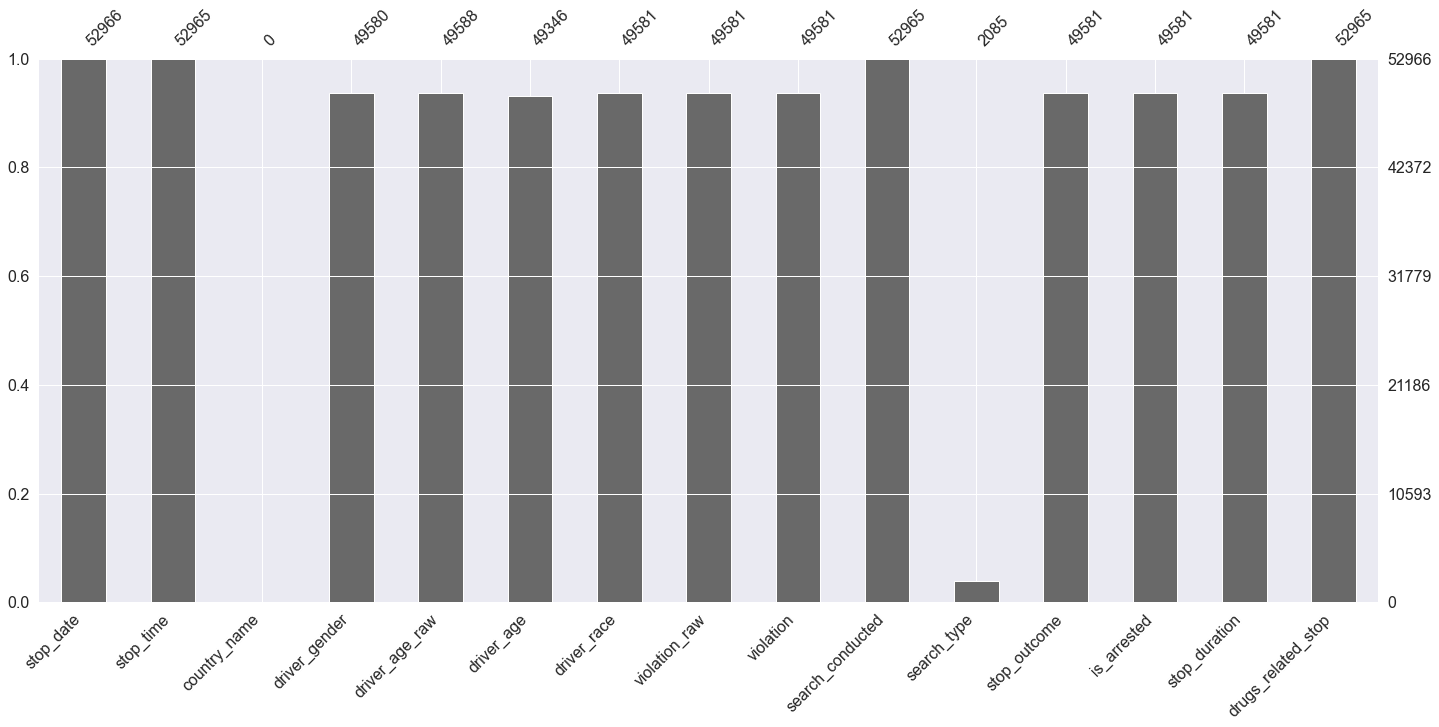

In [418]:
# The barplot provides a simple plot where each bar represents a column within the dataframe
msno.bar(dataset)

We can see clearly here that country name and search type are seriously missing values.
I am going to drop these 2 as there are too many missing values

In [419]:
dataset.drop(columns = ["country_name", "search_type"], inplace=True, axis=1)

<AxesSubplot:>

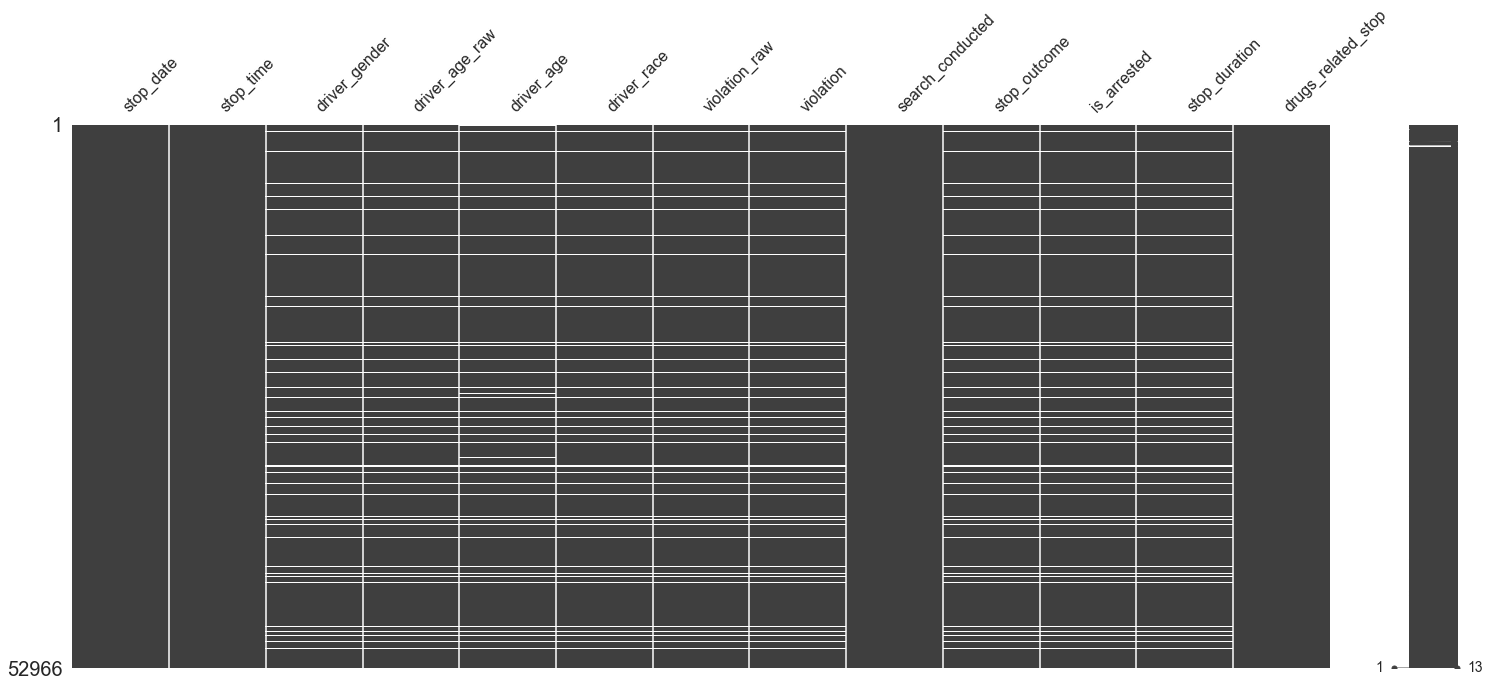

In [420]:
# Matrix plots allow you to plot data as color-encoded matrices 
# and can also be used to indicate clusters within the data
msno.matrix(dataset)

We can see that if there are empty value it is consistent in that row so it will be sensible removing rows containing null values

<AxesSubplot:>

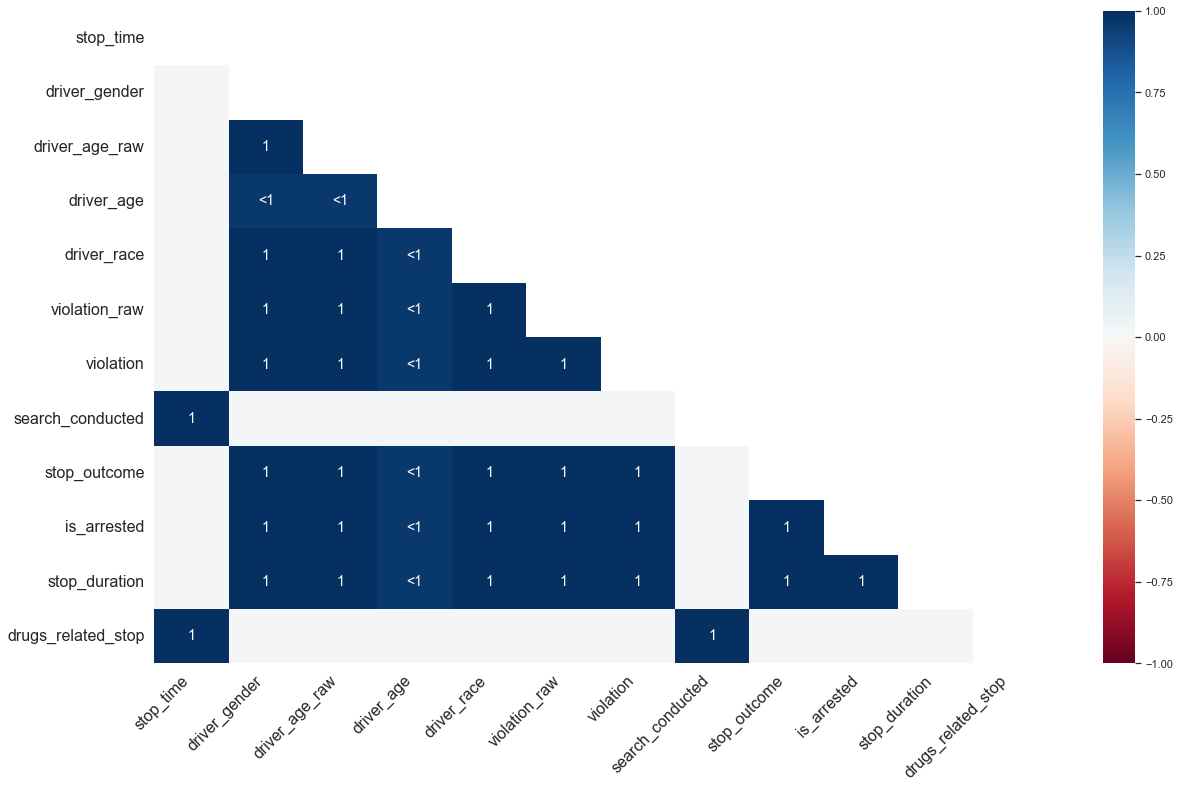

In [422]:
# The heatmap is used to identify correlations of the nullity between each of the different columns.
# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) 
# to 0 (variables appearing or not appearing have no effect on one another) 
# to 1 (if one variable appears the other definitely also does).
# <1 or >-1 have a correlation that is close to being exactingly negative or positive
msno.heatmap(dataset)

As you can see in the above plot theres a strong correlation between the missing value so even the driver_age is very close to 1 so I think it safe to remove rows where null values are found in them

In [423]:
dataset.dropna(subset = ["driver_gender"], inplace=True)
dataset

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,1979.0,32.0,White,Speeding,Speeding,False,Arrest Driver,True,0-15 Min,False
52958,10/4/2011,22:36,F,1967.0,44.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False
52959,10/4/2011,23:25,F,1991.0,20.0,Black,Speeding,Speeding,False,Citation,False,0-15 Min,False
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


Removing drive_age_raw as I see no need for it as I only need the age of the violator for when the violation happened and I have that information in driver_age column

In [424]:
dataset.drop("driver_age_raw", inplace=True, axis=1) 
dataset.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [206]:
# checking for missing values
dataset.isnull().sum()

stop_date               0
stop_time               0
driver_gender           0
driver_age            240
driver_race             0
violation_raw           0
violation               0
search_conducted        0
stop_outcome            0
is_arrested             0
stop_duration           0
drugs_related_stop      0
dtype: int64

<AxesSubplot:>

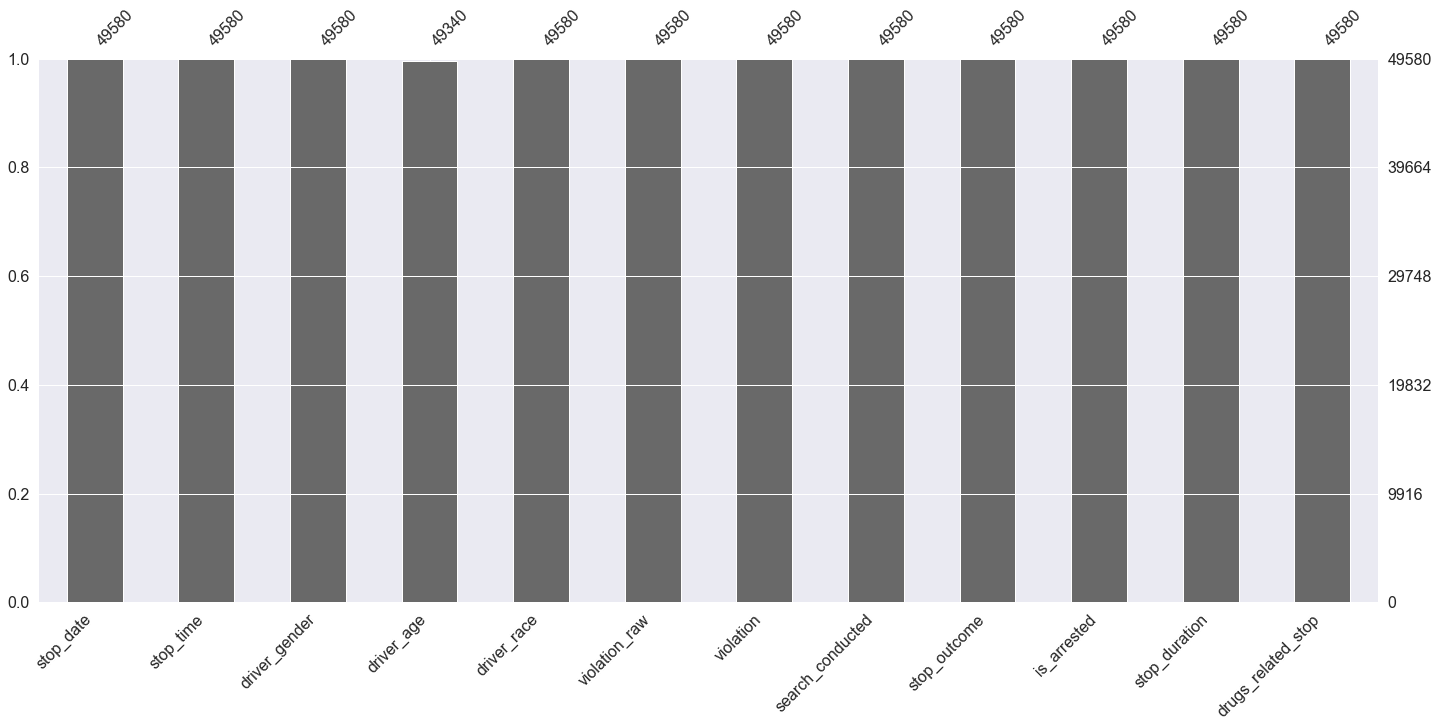

In [425]:
# rechecking using bar plot
msno.bar(dataset)

The bar and the list both shows that there is still 240 missing value in the driver age column.
I found this reddit article while finding ways to deal with missing age and decided to use the mean of the group with same charateristic.
https://stackoverflow.com/questions/61310486/filling-missing-age-in-titanic-dataset  
I chose characteristic that would make sense when talking about the age like the gender & race. Maybe the race could be excluded as this dataset could be skewed towards a particular race but I decided to keep it in.

<AxesSubplot:>

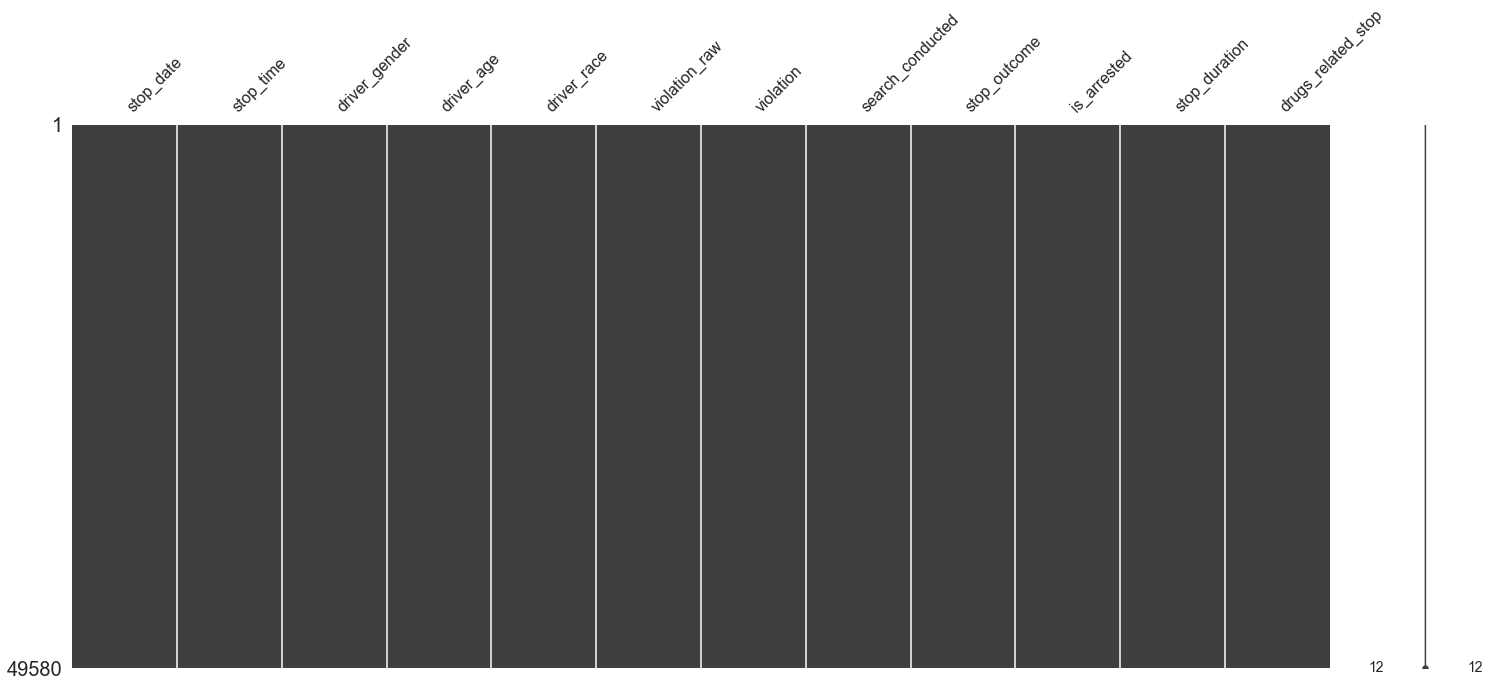

In [426]:
l_col = ["driver_gender", "driver_race"]
dataset["driver_age"] = dataset["driver_age"].fillna(dataset.groupby(l_col)["driver_age"].transform("mean"))
msno.matrix(dataset)

I think the dataset is now perfectly ready to be analyzed with a few more tweaks needed

### 2.2 Further modification

In [427]:
# copying the modified dataframe to a new variable
cleaned_data = dataset.copy()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49580 entries, 0 to 52964
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49580 non-null  object 
 1   stop_time           49580 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age          49580 non-null  float64
 4   driver_race         49580 non-null  object 
 5   violation_raw       49580 non-null  object 
 6   violation           49580 non-null  object 
 7   search_conducted    49580 non-null  object 
 8   stop_outcome        49580 non-null  object 
 9   is_arrested         49580 non-null  object 
 10  stop_duration       49580 non-null  object 
 11  drugs_related_stop  49580 non-null  object 
dtypes: float64(1), object(11)
memory usage: 4.9+ MB


I would like to change some of the column name i.e the gender, age and race column name as I see it will not affect the analysis much if I shorted it.

In [429]:
cleaned_data.rename(columns={'driver_gender': 'gender', 
                             'driver_age': 'age', 
                             'driver_race': 'race'}, inplace = True)

I would further like to change the datatype of certain column to more appropriate one  
Help used for this part  
 - https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
 - format: '%d/%m/%y %H:%M:%S
 - https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html 

In [430]:
# convert column to datetime pandas
cleaned_data['stop_date'] = pd.to_datetime(cleaned_data['stop_date'])
# extract the hour from the stop_time for future comparison
cleaned_data['stop_hour'] = pd.to_datetime(cleaned_data['stop_time'], format='%H:%M').dt.hour
cleaned_data.head()

,stop_date,stop_time,gender,age,race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,8
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,23
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,17
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,10


search_conducted has boolean True/False values, but for further calculations I need 1/0 representation. I found this at the end so doing it up here to make it look clean.
https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe

In [431]:
cleaned_data["search_conducted"] = cleaned_data["search_conducted"].astype(int)

In [432]:
cleaned_data.head()

,stop_date,stop_time,gender,age,race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False,1
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False,8
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False,23
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,16-30 Min,False,17
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,False,0-15 Min,False,10


In [433]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49580 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           49580 non-null  datetime64[ns]
 1   stop_time           49580 non-null  object        
 2   gender              49580 non-null  object        
 3   age                 49580 non-null  float64       
 4   race                49580 non-null  object        
 5   violation_raw       49580 non-null  object        
 6   violation           49580 non-null  object        
 7   search_conducted    49580 non-null  int32         
 8   stop_outcome        49580 non-null  object        
 9   is_arrested         49580 non-null  object        
 10  stop_duration       49580 non-null  object        
 11  drugs_related_stop  49580 non-null  object        
 12  stop_hour           49580 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), in

It is now ready for real this time

## 3 Exploratory data analysis

In [435]:
# for a new section the dataframe is being handed to a new variable
data = cleaned_data.copy()

### 3.1 Distribution of ages
https://stackoverflow.com/questions/38146009/how-to-plot-age-distribution-with-pandas

In [436]:
# Generates descriptive statistics of the age column
data["age"].describe()

count    49580.000000
mean        34.173629
std         12.739553
min         15.000000
25%         23.000000
50%         31.000000
75%         43.000000
max         88.000000
Name: age, dtype: float64

In [437]:
# group gender and age by the gender column
data[["gender", "age"]].groupby("gender").mean()

,age
gender,
F,32.300165
M,34.840543


gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

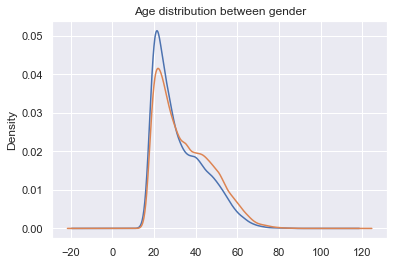

In [438]:
# plots the gender against age distribution
data.groupby('gender').age.plot(kind='kde', title = "Age distribution between gender")

Observations 
 - 20 to 50 age group covers most of the violation
 - The minimum age of someone has been as low 15 and as high as 88
 - The female and male has similar structure to their wave and their respective mean value are also close together which shows that gender has no correlation with act of violation but the male violator has the highest peak so maybe females are better drivers?

### 3.2 Most frequent violation
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

In [439]:
# returns the mode value of the violation column
# The mode of a set of values is the value that appears most often.
data['violation'].mode()

0    Speeding
Name: violation, dtype: object

In [440]:
# seperates each violation type with it respective amount
violation_types = data['violation'].value_counts()
violation_types

Speeding               32138
Moving violation        8385
Equipment               4276
Other                   2961
Registration/plates     1820
Name: violation, dtype: int64

<AxesSubplot:ylabel='violation'>

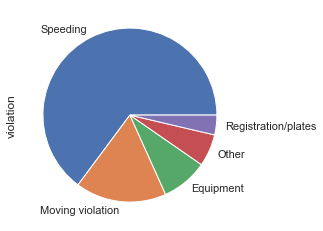

In [441]:
# plots the violation types graph
violation_types.plot.pie()

As you can from the above list and pie chart the most frquent form of violation is speeding as I said in the introduction of this project.

### 3.3 Should the road be avoided during certain hours of the day
https://seaborn.pydata.org/generated/seaborn.countplot.html

I'll be using what I created earlier while doing modification on the dataset which took the hour digit of when the the vehicle were stopped and stored the hour value in a separate column

In [357]:
# returns the mode of the stop_hour
data['stop_hour'].mode()

0    10
Name: stop_hour, dtype: int64

<AxesSubplot:xlabel='stop_hour', ylabel='count'>

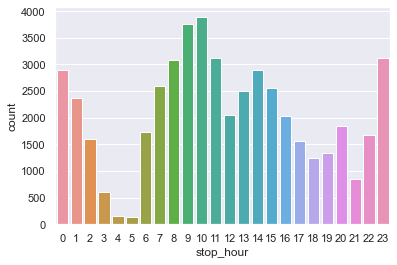

In [442]:
# plots the stop_hour against its amount
sns.countplot(x="stop_hour", data=data)

My parameter for determining what to choose for the frquent list was if the counts exceeded the 2500 mark as it looked like the right amount to me.
 
Observations
 - Violation were most frequent as early as 7:00 in the morning until 15:00 in the afternoon and it got more frequent again between 23:00 and midnight.
 - The frequency was lower after midnight and late evening hours.

### 3.4 Race distribution
https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

<AxesSubplot:ylabel='race'>

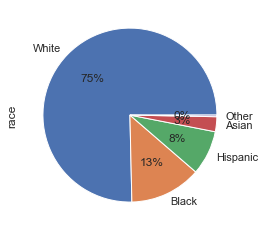

In [443]:
# plots a pie chart using the race type with its respective amount
race_types = data['race'].value_counts()
race_types.plot(kind='pie', autopct='%1.0f%%')

Observations
 - The traffic violator consist of mostly White, Black, Asian & Hispanic with unnoticeable amount of other race. 
 - From among them the chart shows that the white race were the one with the most traffic violators with a substantial 75%. This made me wonder as I expected a more even distribution but maybe the dataset was taken from a place where the white race is very eminent and other race are outliers makign the dataset skewed.

### 3.5 Search conducted based on race

I wanted to know if race had anything to do with how likely they are going to searched.  
This was one of the question I had when I first saw the dataset as I see racism frequently.   
I wondered how I could test racism then the thought came as I was looking for a piece to compare then remembered a talk where I heard that black people were more likely to be stopped even though, as a whole, they drive less but since the previous analysis showed that the data is skewed towards the white race I could not use the race distribution.  
Then I found this article: https://sc.edu/uofsc/posts/2020/06/racial_disparities_traffic_stops.php#.Yri1b2Azbb0  
which said "Blacks were 115 percent more likely than whites to be searched in a traffic stop (5.05 percent for blacks, 2.35 percent for whites)".

In [444]:
# checking if there are enough true values to go one with this analysis
data['search_conducted'].value_counts()

0    47495
1     2085
Name: search_conducted, dtype: int64

In [445]:
# rows containing the true value
data1 = data[data['search_conducted'] == 1]
data1.head()

,stop_date,stop_time,gender,age,race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
24,2005-08-28,1:00,M,26.0,White,Other Traffic Violation,Moving violation,1,Arrest Driver,True,16-30 Min,False,1
40,2005-10-01,0:00,M,17.0,White,Equipment/Inspection Violation,Equipment,1,Arrest Driver,True,16-30 Min,True,0
41,2005-10-01,0:00,M,17.0,White,Equipment/Inspection Violation,Equipment,1,Citation,False,30+ Min,True,0
80,2005-10-02,9:30,M,30.0,White,Speeding,Speeding,1,Arrest Driver,True,30+ Min,False,9
106,2005-10-03,14:00,M,27.0,Black,Equipment/Inspection Violation,Equipment,1,Citation,False,16-30 Min,False,14


In [446]:
# group the true value with its respective race
data1.groupby('race')[['search_conducted']].sum()

,search_conducted
race,
Asian,32
Black,510
Hispanic,337
Other,1
White,1205


In [447]:
# loading the respective race value counts
data['race'].value_counts()

White       37363
Black        6594
Hispanic     4099
Asian        1375
Other         149
Name: race, dtype: int64

In [448]:
# Seeing the percentile of each race based on whether thery were stopped
print("asian", 32/1375 * 100)
print("black", 510/6594 * 100)
print("hispanic", 337/4099 * 100)
print("other", 1/149 * 100)
print("white", 1205/6594 * 100)

asian 2.327272727272727
black 7.734303912647862
hispanic 8.221517443278849
other 0.6711409395973155
white 18.274188656354262


I see I have contradicted myself by the above result but thats all part of the journey. I think I failed because the white race had far too many records compared to the other race that it did not matter or mayyybe I did something wrong along the way or my way of going on about this was not right.

## 4 Summary

### 4.1 Conclusion

Through this exploratory analysis I was able to find some interesting correlations & relationship which makes me wonder that this dataset has yet to show its full potential. There is so much more questions and relationships yet to be discovered regarding other columns such stop_outcome, is_arrested, stop_duration & so much more.

There were failed analyses as well regarding the race distribution and race|search conducted part but thats to be expected when conducting research on a new subject.

For future analysis it would be useful to analyse the drug related stops and if there was a difference regarding the arrest if search was conducted or not and more interesting and complex relationships

### 4.2 Summary of the analyses

 - There show to be no correlation with the act of traffic violation and gender
 - There seems to be a record of traffic violations for minimum age as low as 15 and as high as 88 showing no age group is safe from it
 - Frquent form of violation is speeding as expected
 - Drive only during the late evening hours avoiding the 23:00 to 00:00 timeframe and 7:00 to 15:00 timeframe. (Just kidding) 
 - Not taking the last 2 analyses into consideration as both were defeated


## 5 References and Resources

References & resources were included along the way as I progressed with the project as I used referenced for most of the project and it would have taken alot of going back and forth to verify everything

For the layout of this project I used the following link: https://www.coursera.org/learn/uol-cm2015-programming-with-data/supplement/N8vlX/example-report

In [449]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
